##### duration: 2 hrs

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from pathlib import Path
import sys
import logging
logging.basicConfig(level=logging.INFO)
print(sys.executable)

/n/groups/datta/tim_sainburg/conda_envs/peromoseq/bin/python3


### Get recording info (google sheets)

In [3]:
import requests
import pandas as pd
from io import BytesIO

In [4]:
# spreadsheet_url = 'https://docs.google.com/spreadsheet/ccc?key=14HIqUaSl_n-91hpAvmACY_iVY9nLKdlA6qklhxfZon0&output=csv&gid=0'
spreadsheet_url = "https://docs.google.com/spreadsheet/ccc?key=1jACsUmxuJ9Une59qmvzZGc1qXezKhKzD1zho2sEfcrU&output=csv&gid=0"
response = requests.get(spreadsheet_url)
recording_df = pd.read_csv(BytesIO(response.content))

In [5]:
recording_df[:3]

,Subject,duration_m,video_recording_id,ephys_id,calibration_id,calibration_board_shape,calibration_square_size,video_location_on_o2,ephys_location_on_o2,calibration_location_on_o2
0,M04002,10,24-05-01-13-26-43-110846,2024-05-01_13-26-37,24-05-01-13-45-07-825493,NaN,NaN,/n/groups/datta/tim_sainburg/datasets/chronic2...,/n/groups/datta/tim_sainburg/datasets/chronic2...,/n/groups/datta/tim_sainburg/datasets/chronic2...


### Run sync

In [6]:
for idx, recording_row in recording_df.iterrows():
    break

In [7]:
recording_row

Subject                                                                  M04002
duration_m                                                                   10
video_recording_id                                     24-05-01-13-26-43-110846
ephys_id                                                    2024-05-01_13-26-37
calibration_id                                         24-05-01-13-45-07-825493
calibration_board_shape                                                     NaN
calibration_square_size                                                     NaN
video_location_on_o2          /n/groups/datta/tim_sainburg/datasets/chronic2...
ephys_location_on_o2          /n/groups/datta/tim_sainburg/datasets/chronic2...
calibration_location_on_o2    /n/groups/datta/tim_sainburg/datasets/chronic2...
Name: 0, dtype: object

In [25]:
board_shape = (5, 7)
square_size = 12.5
n_frames_to_sample = 2000
n_jobs = 10
camera_names = ['FrontLeft']

INFO:multicamera_airflow_pipeline.tim_240731.calibration:Python interpreter binary location: /n/groups/datta/tim_sainburg/conda_envs/peromoseq/bin/python3


In [26]:
output_directory = Path("/n/groups/datta/tim_sainburg/datasets/scratch/") / "240806-3d-pipeline"

In [27]:
output_directory_camera_calibration = output_directory / 'camera_calibration' / recording_row / calibration_id
output_directory_camera_calibration.mkdir(parents=True, exist_ok=True)

In [28]:
from multicamera_airflow_pipeline.tim_240731.calibration import Calibrator 

In [29]:
calibration_video_directory = Path(recording_row.calibration_location_on_o2) / recording_row.calibration_id

In [34]:
camera_calibrator = Calibrator(
    calibration_video_directory = calibration_video_directory,
    calibration_output_directory = output_directory_camera_calibration,
    camera_names = None,
    board_shape = board_shape,
    square_size = square_size,
    n_frames_to_sample = n_frames_to_sample,
    n_jobs = n_jobs,
)

INFO:multicamera_airflow_pipeline.tim_240731.calibration:Checking if calibration is already completed
INFO:multicamera_airflow_pipeline.tim_240731.calibration:None
INFO:multicamera_airflow_pipeline.tim_240731.calibration:Retrieving camera names
INFO:multicamera_airflow_pipeline.tim_240731.calibration:[PosixPath('/n/groups/datta/tim_sainburg/datasets/chronic24/video/calibration/24-05-01-13-45-07-825493/24-05-01-13-45-07-825493.BackBottom.0.mp4'), PosixPath('/n/groups/datta/tim_sainburg/datasets/chronic24/video/calibration/24-05-01-13-45-07-825493/24-05-01-13-45-07-825493.BackLeft.0.mp4'), PosixPath('/n/groups/datta/tim_sainburg/datasets/chronic24/video/calibration/24-05-01-13-45-07-825493/24-05-01-13-45-07-825493.BackRight.0.mp4'), PosixPath('/n/groups/datta/tim_sainburg/datasets/chronic24/video/calibration/24-05-01-13-45-07-825493/24-05-01-13-45-07-825493.FrontBottom.0.mp4'), PosixPath('/n/groups/datta/tim_sainburg/datasets/chronic24/video/calibration/24-05-01-13-45-07-825493/24-05-01-

ffmpeg -f concat -safe 0 -i /tmp/tmpiy0l6uve/temp_list.txt -c copy /tmp/tmpigd5mafi/BackBottom.mp4


ffmpeg version 4.2 Copyright (c) 2000-2019 the FFmpeg developers
  built with gcc 7.3.0 (crosstool-NG 1.23.0.449-a04d0)
  configuration: --prefix=/home/tis697/.conda/envs/jupyter_launcher --cc=/home/conda/feedstock_root/build_artifacts/ffmpeg_1566210161358/_build_env/bin/x86_64-conda_cos6-linux-gnu-cc --disable-doc --disable-openssl --enable-avresample --enable-gnutls --enable-gpl --enable-hardcoded-tables --enable-libfreetype --enable-libopenh264 --enable-libx264 --enable-pic --enable-pthreads --enable-shared --enable-static --enable-version3 --enable-zlib --enable-libmp3lame
  libavutil      56. 31.100 / 56. 31.100
  libavcodec     58. 54.100 / 58. 54.100
  libavformat    58. 29.100 / 58. 29.100
  libavdevice    58.  8.100 / 58.  8.100
  libavfilter     7. 57.100 /  7. 57.100
  libavresample   4.  0.  0 /  4.  0.  0
  libswscale      5.  5.100 /  5.  5.100
  libswresample   3.  5.100 /  3.  5.100
  libpostproc    55.  5.100 / 55.  5.100
[h264 @ 0x556c66d81100] Stream #0: not enough f

ffmpeg -f concat -safe 0 -i /tmp/tmpbrpm5qha/temp_list.txt -c copy /tmp/tmpigd5mafi/BackLeft.mp4


frame= 7200 fps=0.0 q=-1.0 Lsize=  230605kB time=00:01:00.02 bitrate=31474.3kbits/s speed= 140x    
video:230528kB audio:0kB subtitle:0kB other streams:0kB global headers:0kB muxing overhead: 0.033438%
ffmpeg version 4.2 Copyright (c) 2000-2019 the FFmpeg developers
  built with gcc 7.3.0 (crosstool-NG 1.23.0.449-a04d0)
  configuration: --prefix=/home/tis697/.conda/envs/jupyter_launcher --cc=/home/conda/feedstock_root/build_artifacts/ffmpeg_1566210161358/_build_env/bin/x86_64-conda_cos6-linux-gnu-cc --disable-doc --disable-openssl --enable-avresample --enable-gnutls --enable-gpl --enable-hardcoded-tables --enable-libfreetype --enable-libopenh264 --enable-libx264 --enable-pic --enable-pthreads --enable-shared --enable-static --enable-version3 --enable-zlib --enable-libmp3lame
  libavutil      56. 31.100 / 56. 31.100
  libavcodec     58. 54.100 / 58. 54.100
  libavformat    58. 29.100 / 58. 29.100
  libavdevice    58.  8.100 / 58.  8.100
  libavfilter     7. 57.100 /  7. 57.100
  libavre

ffmpeg -f concat -safe 0 -i /tmp/tmpm1ww4dg5/temp_list.txt -c copy /tmp/tmpigd5mafi/BackRight.mp4


frame= 7200 fps=0.0 q=-1.0 Lsize=  230680kB time=00:01:00.02 bitrate=31484.5kbits/s speed= 140x    
video:230603kB audio:0kB subtitle:0kB other streams:0kB global headers:0kB muxing overhead: 0.033373%
ffmpeg version 4.2 Copyright (c) 2000-2019 the FFmpeg developers
  built with gcc 7.3.0 (crosstool-NG 1.23.0.449-a04d0)
  configuration: --prefix=/home/tis697/.conda/envs/jupyter_launcher --cc=/home/conda/feedstock_root/build_artifacts/ffmpeg_1566210161358/_build_env/bin/x86_64-conda_cos6-linux-gnu-cc --disable-doc --disable-openssl --enable-avresample --enable-gnutls --enable-gpl --enable-hardcoded-tables --enable-libfreetype --enable-libopenh264 --enable-libx264 --enable-pic --enable-pthreads --enable-shared --enable-static --enable-version3 --enable-zlib --enable-libmp3lame
  libavutil      56. 31.100 / 56. 31.100
  libavcodec     58. 54.100 / 58. 54.100
  libavformat    58. 29.100 / 58. 29.100
  libavdevice    58.  8.100 / 58.  8.100
  libavfilter     7. 57.100 /  7. 57.100
  libavre

ffmpeg -f concat -safe 0 -i /tmp/tmpfo79e2vh/temp_list.txt -c copy /tmp/tmpigd5mafi/FrontBottom.mp4


Input #0, concat, from '/tmp/tmpfo79e2vh/temp_list.txt':
  Duration: N/A, bitrate: N/A
    Stream #0:0: Video: h264 (High), yuv420p(progressive), 1220x1200 [SAR 1:1 DAR 61:60], 120 fps, 120 tbr, 1200k tbn, 240 tbc
Output #0, mp4, to '/tmp/tmpigd5mafi/FrontBottom.mp4':
  Metadata:
    encoder         : Lavf58.29.100
    Stream #0:0: Video: h264 (High) (avc1 / 0x31637661), yuv420p(progressive), 1220x1200 [SAR 1:1 DAR 61:60], q=2-31, 120 fps, 120 tbr, 1200k tbn, 1200k tbc
Stream mapping:
  Stream #0:0 -> #0:0 (copy)
Press [q] to stop, [?] for help
[mp4 @ 0x55cb61b57f40] Timestamps are unset in a packet for stream 0. This is deprecated and will stop working in the future. Fix your code to set the timestamps properly
frame= 7200 fps=0.0 q=-1.0 Lsize=  230593kB time=00:01:00.02 bitrate=31472.6kbits/s speed= 134x    
video:230516kB audio:0kB subtitle:0kB other streams:0kB global headers:0kB muxing overhead: 0.033283%
ffmpeg version 4.2 Copyright (c) 2000-2019 the FFmpeg developers
  built wit

ffmpeg -f concat -safe 0 -i /tmp/tmp2ophexrr/temp_list.txt -c copy /tmp/tmpigd5mafi/FrontLeft.mp4


Input #0, concat, from '/tmp/tmp2ophexrr/temp_list.txt':
  Duration: N/A, bitrate: N/A
    Stream #0:0: Video: h264 (High), yuv420p(progressive), 1920x950 [SAR 1:1 DAR 192:95], 120 fps, 120 tbr, 1200k tbn, 240 tbc
Output #0, mp4, to '/tmp/tmpigd5mafi/FrontLeft.mp4':
  Metadata:
    encoder         : Lavf58.29.100
    Stream #0:0: Video: h264 (High) (avc1 / 0x31637661), yuv420p(progressive), 1920x950 [SAR 1:1 DAR 192:95], q=2-31, 120 fps, 120 tbr, 1200k tbn, 1200k tbc
Stream mapping:
  Stream #0:0 -> #0:0 (copy)
Press [q] to stop, [?] for help
[mp4 @ 0x558752069f80] Timestamps are unset in a packet for stream 0. This is deprecated and will stop working in the future. Fix your code to set the timestamps properly
frame= 7200 fps=0.0 q=-1.0 Lsize=  230612kB time=00:01:00.02 bitrate=31475.2kbits/s speed= 140x    
video:230535kB audio:0kB subtitle:0kB other streams:0kB global headers:0kB muxing overhead: 0.033402%
ffmpeg version 4.2 Copyright (c) 2000-2019 the FFmpeg developers
  built with 

ffmpeg -f concat -safe 0 -i /tmp/tmpj2qgj2df/temp_list.txt -c copy /tmp/tmpigd5mafi/FrontRight.mp4


Input #0, concat, from '/tmp/tmpj2qgj2df/temp_list.txt':
  Duration: N/A, bitrate: N/A
    Stream #0:0: Video: h264 (High), yuv420p(progressive), 1920x950 [SAR 1:1 DAR 192:95], 120 fps, 120 tbr, 1200k tbn, 240 tbc
Output #0, mp4, to '/tmp/tmpigd5mafi/FrontRight.mp4':
  Metadata:
    encoder         : Lavf58.29.100
    Stream #0:0: Video: h264 (High) (avc1 / 0x31637661), yuv420p(progressive), 1920x950 [SAR 1:1 DAR 192:95], q=2-31, 120 fps, 120 tbr, 1200k tbn, 1200k tbc
Stream mapping:
  Stream #0:0 -> #0:0 (copy)
Press [q] to stop, [?] for help
[mp4 @ 0x55b6239f67c0] Timestamps are unset in a packet for stream 0. This is deprecated and will stop working in the future. Fix your code to set the timestamps properly
frame= 7200 fps=0.0 q=-1.0 Lsize=  230716kB time=00:01:00.02 bitrate=31489.4kbits/s speed= 137x    
video:230639kB audio:0kB subtitle:0kB other streams:0kB global headers:0kB muxing overhead: 0.033433%
INFO:multicamera_airflow_pipeline.tim_240731.calibration:Checking video lengt

Found 7200 frames in each video
Processing /tmp/tmpigd5mafi/BackBottom.mp4


100%|████████████████████████████| 2000/2000 [04:41<00:00,  7.12frame/s]


Processing /tmp/tmpigd5mafi/BackLeft.mp4


100%|████████████████████████████| 2000/2000 [05:36<00:00,  5.94frame/s]


Processing /tmp/tmpigd5mafi/BackRight.mp4


100%|████████████████████████████| 2000/2000 [05:38<00:00,  5.91frame/s]


Processing /tmp/tmpigd5mafi/FrontBottom.mp4


100%|████████████████████████████| 2000/2000 [04:41<00:00,  7.09frame/s]


Processing /tmp/tmpigd5mafi/FrontLeft.mp4


100%|████████████████████████████| 2000/2000 [05:29<00:00,  6.07frame/s]


Processing /tmp/tmpigd5mafi/FrontRight.mp4


100%|████████████████████████████| 2000/2000 [05:39<00:00,  5.90frame/s]
INFO:multicamera_airflow_pipeline.tim_240731.calibration:Initial calibration


Estimating camera intrinsics


100%|█████████████████████████████████████| 6/6 [00:17<00:00,  2.85s/it]


Initializing calibration object poses


100%|█████████████████████████████████████| 6/6 [00:01<00:00,  5.83it/s]


Estimating camera extrinsics
Merging calibration object poses


100%|██████████| 6/6 [00:00<00:00, 10.86it/s]
INFO:multicamera_airflow_pipeline.tim_240731.calibration:Bundle adjustment


   Iteration     Total nfev        Cost      Cost reduction    Step norm     Optimality   
       0              1         7.8611e+05                                    1.17e+07    
       1              6         7.0555e+05      8.06e+04       6.06e+01       8.01e+06    
       2              7         6.8185e+05      2.37e+04       9.77e+01       2.72e+06    
       3              8         6.5868e+05      2.32e+04       2.62e+01       2.19e+06    
       4              9         6.3858e+05      2.01e+04       5.98e+01       1.76e+06    
       5             10         6.2836e+05      1.02e+04       6.27e+01       1.36e+06    
       6             11         6.1802e+05      1.03e+04       7.14e+01       1.19e+06    
       7             12         6.1262e+05      5.40e+03       7.16e+01       1.05e+06    
       8             13         6.0684e+05      5.78e+03       1.93e+01       1.02e+06    
       9             14         6.0299e+05      3.85e+03       3.91e+01       9.63e+05    

INFO:multicamera_airflow_pipeline.tim_240731.calibration:Saving calibration


      60             73         5.1718e+05      4.76e+01       5.30e+00       1.26e+05    
`ftol` termination condition is satisfied.
Function evaluations 73, initial cost 7.8611e+05, final cost 5.1718e+05, first-order optimality 1.26e+05.


100%|██████████| 6/6 [00:00<00:00, 10.75it/s]


Median Error: [0.40795938 0.40562101 0.30505577 0.43126842 0.35119856 0.33889833]


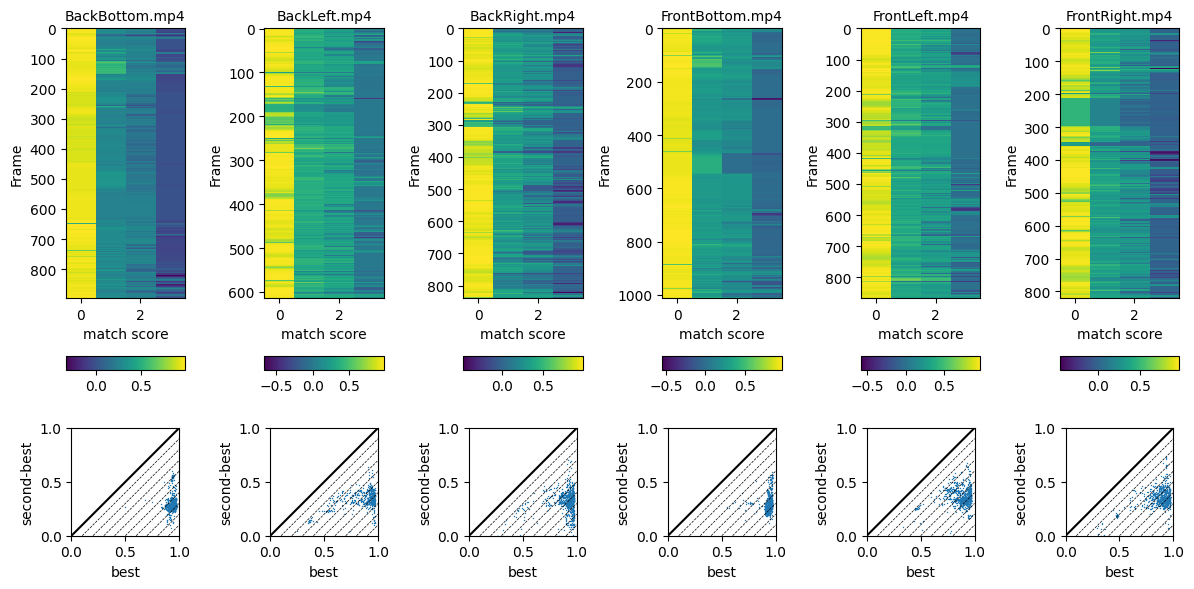

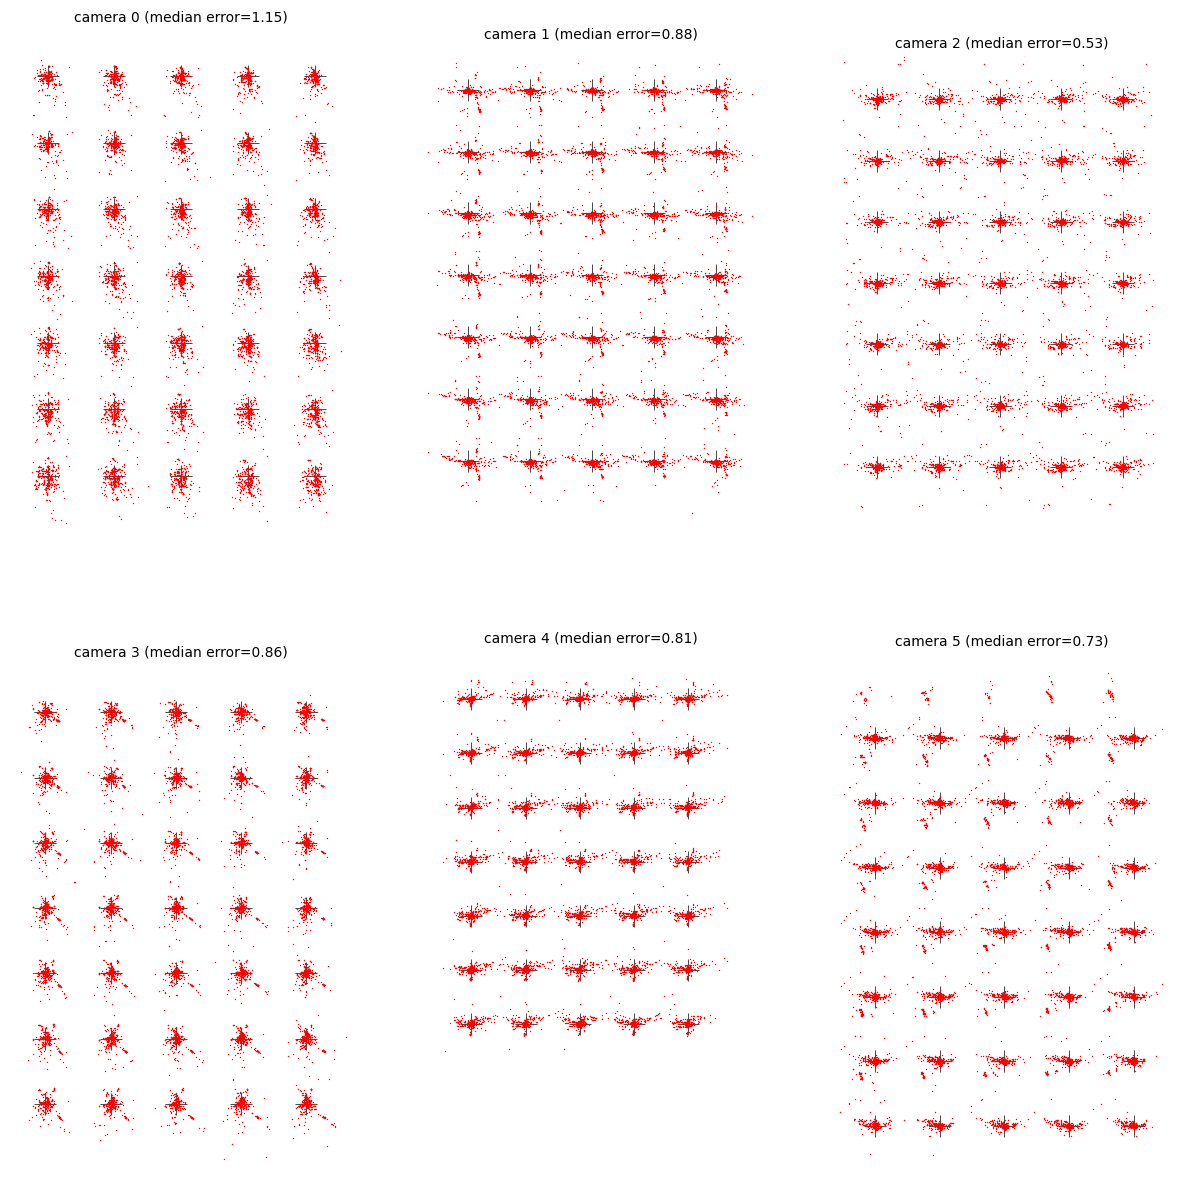

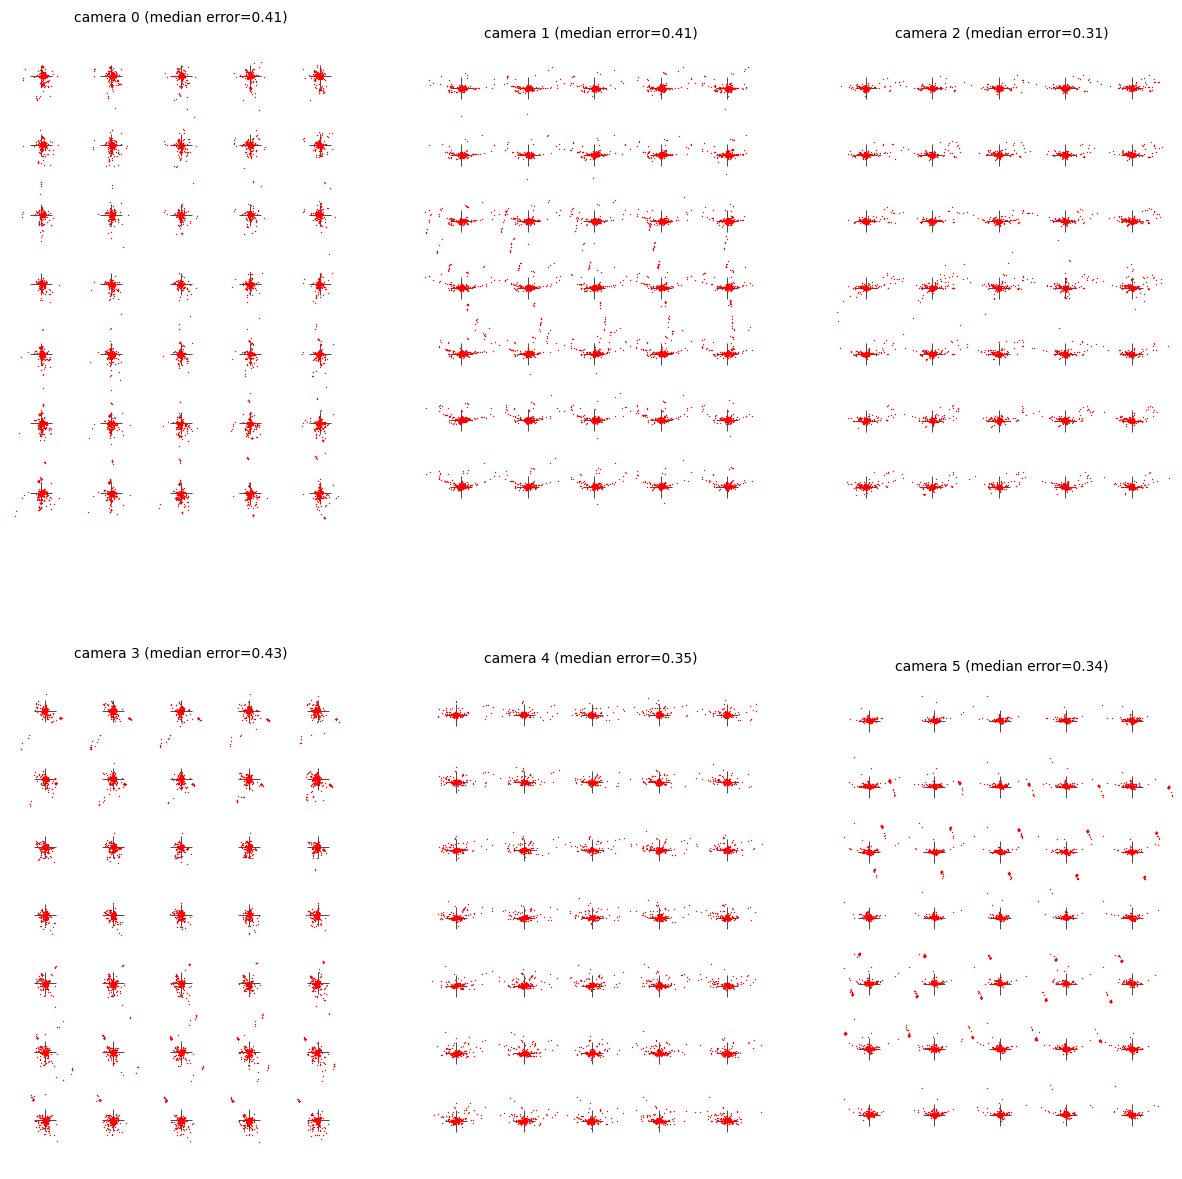

In [35]:
camera_calibrator.run()